In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import SVD

In [3]:
df=pd.read_csv("ml-latest-small\info.csv") 
df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [4]:
df1=pd.read_csv("ml-latest-small\movies.csv") 
df1

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [5]:
df.isnull().sum().to_frame('nan_count')
df1.isnull().sum().to_frame('nan_count') #결측치 x.

,nan_count
movieId,0
title,0
genres,0


In [6]:
genres=["Action", "Adventure","Animation","Children","Comedy","Crime","Documentary","Drama","Fantasy","Film-Noir",
"Horror","Musical","Mystery","Romance","Sci-Fi","Thriller","War","Western"]
genres_count=[0 for i in range(18)]
genres_value=[0 for i in range(18)]



In [7]:
#먼저 장르에 따른 사람들의 수요와 평균적인 평점을 계산해보려고 한다. 
df=df.sort_values('movieId') #n*m으로 탐색 대신에 n+m으로 탐색을 통해 시간 줄이기.
index=0
for i in range(len(df1)):
    value=0
    count=0
    while (True):
        if (df['movieId'][index]>df1['movieId'][i]):
            break
        value+=df['rating'][index]
        count+=1
        index+=1  #index최신화
        if (i==9741): #마지막 항 계산한 후에는 while문 탈출해줘야 함. 
            break

    for j in range (18):
        if genres[j] in df1['genres'][i]:
            genres_count[j]+=count
            genres_value[j]+=value
            




In [8]:
genres_count, genres_value

([27596,
  793,
  24140,
  44,
  3791,
  1819,
  1000,
  794,
  51,
  1,
  18,
  22,
  20,
  725,
  23960,
  19896,
  27,
  8],
 [95969.0,
  3065.5,
  83878.5,
  198.0,
  13324.5,
  5656.5,
  3395.0,
  3066.5,
  217.5,
  5.0,
  62.0,
  103.0,
  83.0,
  2768.0,
  86376.5,
  72002.0,
  119.0,
  33.5])

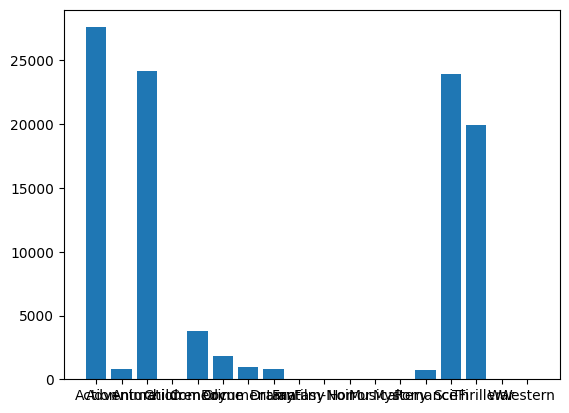

In [9]:
plt.bar(range(len(genres_count)), genres_count)
plt.xticks(range(len(genres)), genres)
plt.show()
#장르별 많이 본 횟수. action,animation,sf,thriller 순서로 4개가 가장 많이 봄.

In [10]:
for i in range (18):
    genres_value[i]=genres_value[i]/genres_count[i]


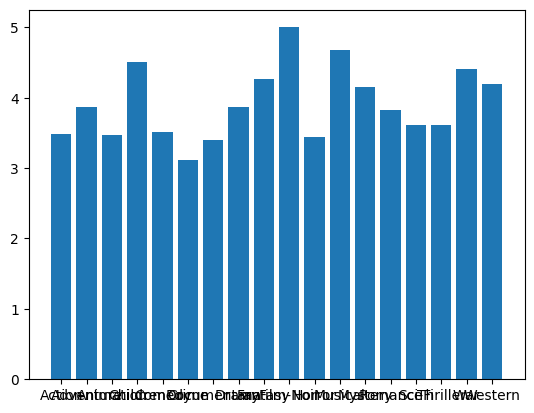

In [11]:
plt.bar(range(len(genres_value)), genres_value)
plt.xticks(range(len(genres)), genres)
plt.show()
#장르별 평점 계산. 큰 차이 없이 다 비슷한 경향을 보임.

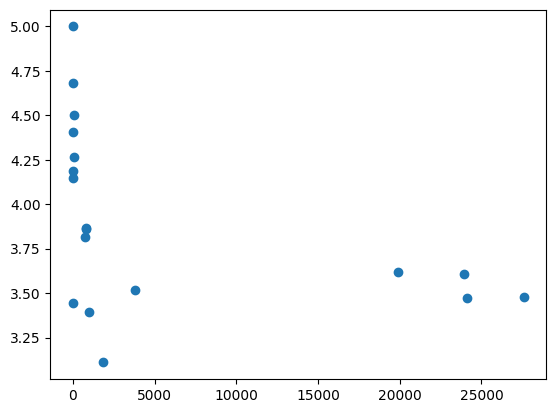

In [12]:
plt.scatter(genres_count,genres_value)
plt.show()
#많이 본 것과 평점 사이의 관계가 크게 없어보임. 단지 표본의 부족으로 앞쪽의 평균들이 다양한 것으로 파악.

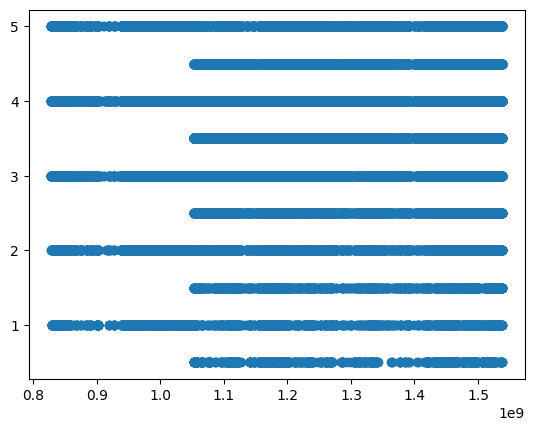

In [13]:
plt.scatter(df['timestamp'],df['rating'])
plt.show()
#timestamp와 rating과의 관계는 크게 없다고 판단하였다. 

In [14]:
#memory based cf  첫번째 user-based
algo=KNNWithMeans(sim_options={"name":"cosine", "user_based":True}) #user기반이고, 그 후에 itme based로 진행하려면 false.

In [15]:
df=df.sort_index() #원래대로 df 돌려놓기.

In [16]:
reader = Reader(rating_scale=(0.5, 5.0)) 
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader=reader)
#왜인지 모르겠지만 이 방법을 쓰면 timestamp자리에 none이 뜨므로 이방법 말고 파일을 다시 불러오는 것으로 변경.

In [17]:

df=pd.read_csv('ml-latest-small\info.csv')
df.to_csv('data.csv',index=False,header=False)
reader = Reader(line_format='user item rating timestamp', sep= ',', rating_scale=(0.5, 5.0)) 
data=Dataset.load_from_file('data.csv',reader=reader)

In [18]:
trainset, testset = train_test_split(data, test_size=.2, random_state=42)

algo.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [19]:
pred = algo.test(testset)

In [20]:
pred[0]

Prediction(uid='140', iid='6765', r_ui=3.5, est=3.3013537507462494, details={'actual_k': 7, 'was_impossible': False})

In [21]:
algo.predict(str(1),str(2))

Prediction(uid='1', iid='2', r_ui=None, est=4.191657793163899, details={'actual_k': 40, 'was_impossible': False})

In [22]:
#memory based cf  두번째 item-based
algo1=KNNWithMeans(sim_options={"name":"cosine", "user_based":False}) 
algo1.fit(trainset)
pred1 = algo1.test(testset)
pred1[0]

Computing the cosine similarity matrix...
Done computing similarity matrix.


Prediction(uid='140', iid='6765', r_ui=3.5, est=3.1829207742960004, details={'actual_k': 40, 'was_impossible': False})

In [25]:
#model based cf  두번째 item-based
algo2=SVD() 
algo2.fit(trainset)
pred2 = algo2.test(testset)
pred2[0]

Prediction(uid='140', iid='6765', r_ui=3.5, est=3.236804108997737, details={'was_impossible': False})